In [1]:
import os
import requests

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# from utils import get_df_listed_items_by_item_list, get_df_item_by_item_id, get_batch_df_items_by_item_ids
from meli_client import MeliAPI_Client

In [6]:
meli_client = MeliAPI_Client()

In [8]:
item_list = ['chromecast','alexa','amazon fire tv','google home','apple tv']

df = meli_client.get_df_listed_items_by_item_list(item_list = item_list, total_itens=150)

In [9]:
df 

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,...,catalog_listing,discounts,promotion_decorations,promotions,inventory_id,installments_motors,official_store_name,variation_id,variation_filters,variations_data
0,MLA1870755884,Smart Tv Onn Uhd Streaming Device 2° Gen 4k Co...,new,842944-MLU74245601319_012024,MLA24249930,gold_special,,https://www.mercadolibre.com.ar/smart-tv-onn-u...,buy_it_now,MLA,...,True,None,None,None,None,None,NaN,NaN,NaN,NaN
1,MLA1974041816,Xiaomi Mi Tv Stick Full Hd 8gb Chromecast Stre...,new,988091-MLU69826403059_062023,MLA15984003,gold_special,,https://www.mercadolibre.com.ar/xiaomi-mi-tv-s...,buy_it_now,MLA,...,True,None,None,None,None,None,NaN,NaN,NaN,NaN
2,MLA1108749509,Chromecast Ga01919-us Google 4 Generación 4k 8...,new,820731-MEC49046529482_022022,MLA21774715,gold_special,,https://www.mercadolibre.com.ar/chromecast-ga0...,buy_it_now,MLA,...,True,None,None,None,None,None,NaN,NaN,NaN,NaN
3,MLA2028357258,Google Chromecast 4 Generación Con Google Tv B...,new,706996-MLU78013821034_082024,MLA24460156,gold_special,,https://www.mercadolibre.com.ar/google-chromec...,buy_it_now,MLA,...,True,None,None,None,None,None,NaN,NaN,NaN,NaN
4,MLA1867518320,Chromecast With Google Tv De Voz 4ª Generación...,new,635602-MLA74782529607_022024,MLA16233185,gold_special,,https://www.mercadolibre.com.ar/chromecast-wit...,buy_it_now,MLA,...,True,None,None,None,HQNA23741,None,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,MLA1472440651,Apple Tv 4k + Ethernet A2843 3 Gen 2022 4k 12...,used,947827-MLA80571842861_112024,MLA21015901,free,,https://articulo.mercadolibre.com.ar/MLA-14724...,buy_it_now,MLA,...,False,None,None,None,None,None,NaN,182789030652,[COLOR],{'182789030652': {'thumbnail': 'http://http2.m...
74,MLA2010343912,Apple Tv 4k 64gb (wi-fi) - 3.a Generación 2019...,used,857459-MLA82310333535_022025,MLA21459431,free,,https://www.mercadolibre.com.ar/apple-tv-4k-64...,buy_it_now,MLA,...,False,None,None,None,None,None,NaN,NaN,NaN,NaN
75,MLA1480288485,Apple Tv Hd 1080p 2015 A1625 32 Gb 4 Generacio...,used,744545-MLA82866485235_032025,MLA6253543,free,,https://www.mercadolibre.com.ar/apple-tv-hd-10...,buy_it_now,MLA,...,False,None,None,None,None,None,NaN,NaN,NaN,NaN
76,MLA2015918398,Apple Tv 64gb,used,678919-MLA79904938993_102024,MLA6253543,gold_special,,https://articulo.mercadolibre.com.ar/MLA-20159...,buy_it_now,MLA,...,False,None,None,None,None,None,NaN,182916315192,[COLOR],{'182916315192': {'thumbnail': 'http://http2.m...


In [10]:
id_list = df['id'].to_list()

In [11]:
df_item = meli_client.get_batch_df_items_by_item_ids(item_ids=id_list)

In [13]:
df_item.to_csv("item_info_on_ml.csv")

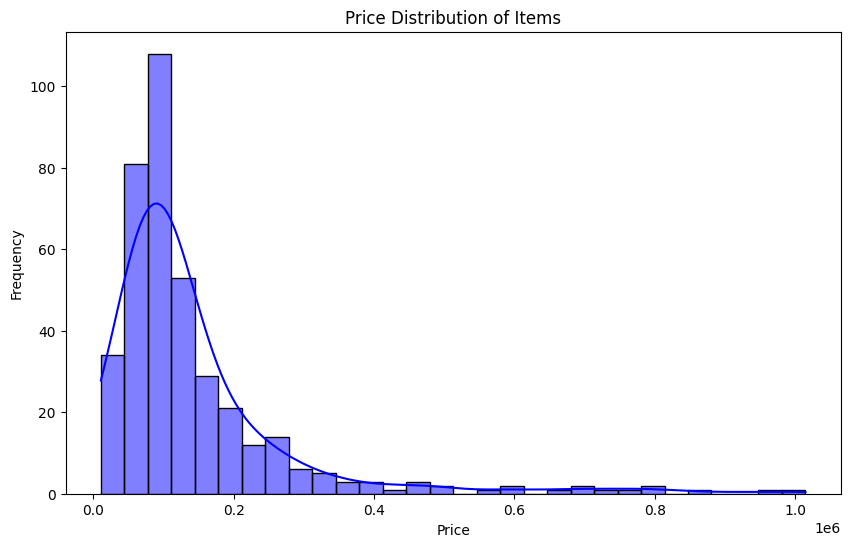

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df_item['price'], kde=True, bins=30, color='blue')
plt.title('Price Distribution of Items')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

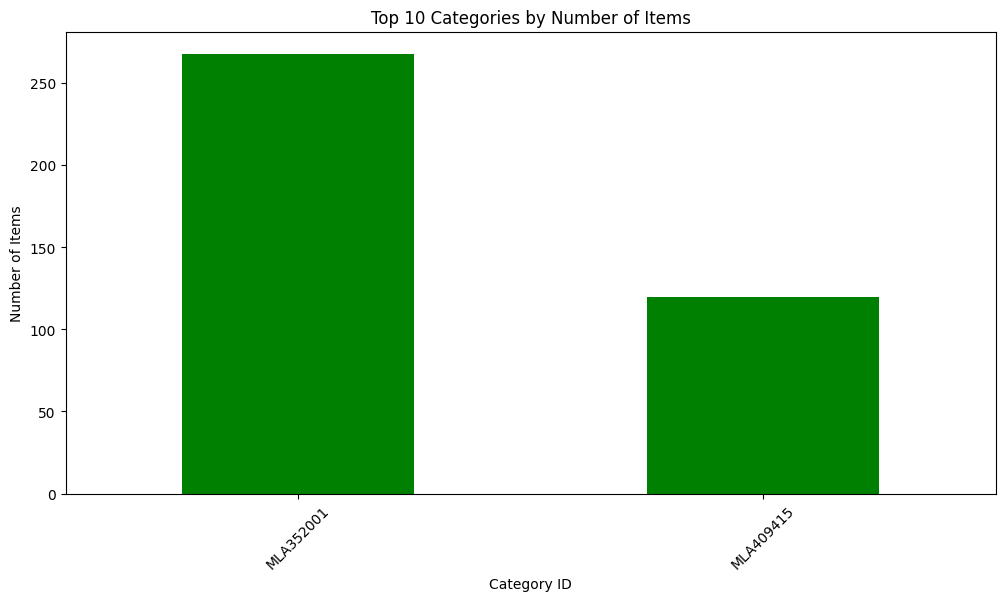

In [15]:
plt.figure(figsize=(12, 6))
df_item['category_id'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Categories by Number of Items')
plt.xlabel('Category ID')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)
plt.show()

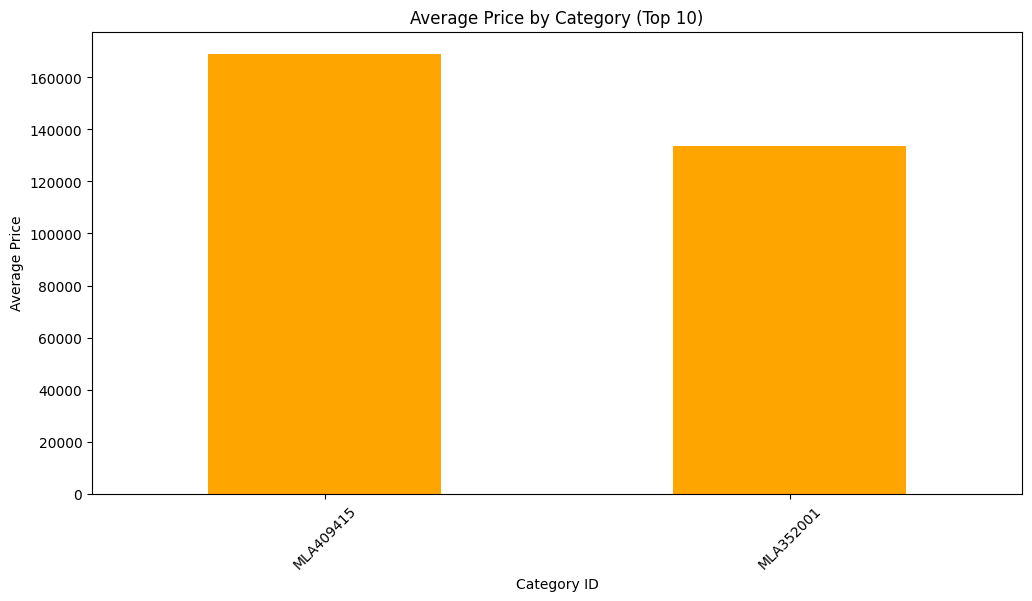

In [16]:
avg_price_by_category = df_item.groupby('category_id')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
avg_price_by_category.plot(kind='bar', color='orange')
plt.title('Average Price by Category (Top 10)')
plt.xlabel('Category ID')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()